## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read the csv file and get familiar with the columns or categories of data in the dataframe

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#check the nunber of rows and columns:
#there are 294,478 user id rows and 5 columns (user_id, timestamp, group, landing_page, converted)

df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#check the number of unique user ids:
#there are 290,584 unique user ids while there are 294,478 timestamps which means that some user ids are duplicates
#there are two groups (control and treatment), two landing pages (old_page and new_page), & the coversion is a boolean (0 or1 )

df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
#calculate the mean of user ids which converted

df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#check the treatment or control group user ids that do not match with the landing page, new page or old page respectively

no_match = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].count()
no_match2 = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')].count()
no_match + no_match2

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
#check if there are missing values in any row

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
#check if there are missing values in any row

df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#create a new dataframe df2 that contains groups that align with their landing pages

df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]
df2.count()

user_id         290585
timestamp       290585
group           290585
landing_page    290585
converted       290585
dtype: int64

In [10]:
#double check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
df.drop(df.query('group == "treatment" and landing_page == "old_page"').index, inplace=True)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
sum(df2['user_id'].duplicated())

1

c. What is the row information for the repeat **user_id**? 

In [14]:
#show repeated rows

df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#delete all duplicate user id rows and count the unique user ids rows again (timestamp with duplicates was 294,478)
#now both user ids and timestamps are unique with a value of 290,584

df2 = df2.drop_duplicates()
df2.count()

user_id         290585
timestamp       290585
group           290585
landing_page    290585
converted       290585
dtype: int64

In [16]:
#check how many user ids are from the treatment group and how many are from the control group

df2.group.value_counts()

treatment    145311
control      145274
Name: group, dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#specify the converting users and show the number

converted_df = df2.query('converted == "1"').shape[0]
converted_df

34753

In [18]:
#divide the converting users by all users to calculate the probability

converted_prob_df = converted_df / df2.shape[0]
converted_prob_df

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#specify the control group users and show the number

control_df = df2.query('group == "control"').shape[0]
control_df

145274

In [20]:
#specify the converting control users and show the number

control_conv_df = df2.loc[df2['group'] == 'control'].loc[df2['converted'] == 1].shape[0]
control_conv_df

17489

In [21]:
#divide the converting control users by all control users to calculate the probability

control_conv_prob_df = control_conv_df / df2.loc[df2['group'] == 'control'].shape[0]
control_conv_prob_df

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
#specify the converting treatment users and show the number

treatment_df = df2.query('group == "treatment"').shape[0]
treatment_df

145311

In [23]:
#specify the converting treatment users and show the number

treatment_conv_df = df2.loc[df2['group'] == 'treatment'].loc[df2['converted'] == 1].shape[0]
treatment_conv_df

17264

In [24]:
#divide the converting treatment users by all treatment users to calculate the probability

treatment_conv_prob_df = treatment_conv_df / df2.loc[df2['group'] == 'treatment'].shape[0]
treatment_conv_prob_df

0.11880724790277405

d. What is the probability that an individual received the new page?

In [25]:
#check how many user ids had the new page and how many had the old page

df2.landing_page.value_counts()

new_page    145311
old_page    145274
Name: landing_page, dtype: int64

In [26]:
new_df = df2.query('landing_page == "new_page"').shape[0]
new_df

145311

In [27]:
#divide the users who received the new page by all users to calculate the probability

new_prob_df = new_df / df2.shape[0]
new_prob_df

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on the probability that any user to convert which is 0.1196, the probability of a control user to convert which is 0.1203, and the probability of a treatment user to convert which is 0.1188, it seems that there is no sufficient evidence that the new treatment page leads to more conversions becasue the probabilities are too close. Although there is no significant difference between the probability of a control user to convert and that of a treatment user to convert, it could be possible that 0.1203 is slightly larger than 0.1188 by chance.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* **$p_{old}$**(null): the old page is better;
* **$p_{new}$**(alternative): the old page is not better

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [28]:
p1 = df2.query('group == "treatment"')['converted'].mean()
p1

0.11880724790277405

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [29]:
p0 = df2.query('group == "control"')['converted'].mean()
p0

0.1203863045004612

c. What is $n_{new}$?

In [30]:
tc = df2.query('group == "treatment"')['converted'].count()
tc

145311

d. What is $n_{old}$?

In [31]:
cc = df2.query('group == "control"')['converted'].count()
cc

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [49]:
new = np.random.choice([1,0], tc, p=[p1, 1-p1])
new.mean()

0.11784379709726035

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [50]:
old = np.random.choice([1,0], cc, p=[p0, 1-p0])
old.mean()

0.12030370197007036

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [51]:
diff = new.mean() - old.mean()
diff

-0.0024599048728100037

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [39]:
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    treatment_df = b_samp.query('group == "treatment"')
    control_ctr = control_df.query('converted == "1"').user_id.count() / control_df.query('converted == "0"').user_id.count()
    treatment_ctr = treatment_df.query('converted == "1"').user_id.count() / treatment_df.query('converted == "0"').user_id.count()
    p_diffs.append(treatment_ctr - control_ctr)

In [40]:
size = df.shape[0]
size
b_samp = df.sample(size, replace=True)
b_samp.user_id.value_counts()

736746    10
773192     9
734800     8
643911     8
729919     8
755763     7
633243     7
719375     7
895080     7
853297     7
662943     7
829558     7
764235     7
830201     7
881351     7
662652     7
653571     7
651655     7
901001     7
794564     7
738502     7
680425     7
802942     7
659557     7
925191     7
790628     7
642210     7
712031     7
660148     7
776226     7
          ..
770020     1
720844     1
716750     1
714703     1
663504     1
659410     1
657363     1
667606     1
677849     1
675802     1
673755     1
688092     1
686045     1
683998     1
772075     1
788501     1
782318     1
724978     1
733174     1
745464     1
741370     1
739323     1
753660     1
819204     1
823302     1
849931     1
835596     1
837645     1
786452     1
630836     1
Name: user_id, Length: 184103, dtype: int64

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

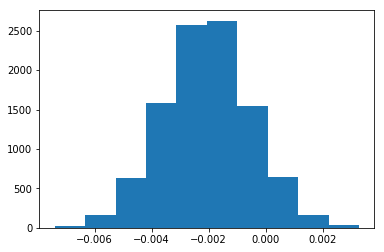

In [41]:
plt.hist(p_diffs);

**The estimating point, which is diff, that is approximatley -0.002 is the middle or the mean of the plot; however, in order to have the plot centered at 0, we need to p_diffs to a numpy array in order to normalize the null hypothesis plot.**

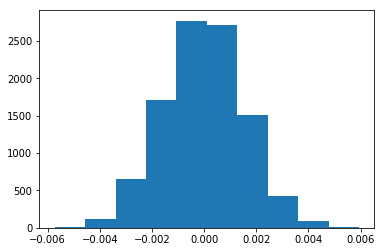

In [52]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

# Simulate/ normlize the distribution to do the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# Plot the null distribution
plt.hist(null_vals);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [58]:
#p-value: find probality of our observed to be null hypotises is true 
#to find this will calculate all values that stay on altrantive region
null= (null_vals > diff).mean()
null

#the probablity is more likely to be null

0.9385

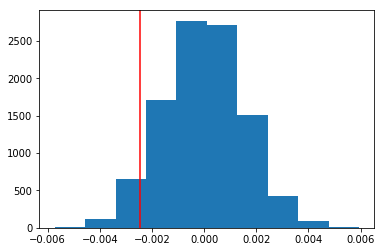

In [55]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(diff, c='red'); #diff is treatment_ctr-control_ctr before the sample distribution

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**It is called the test statistic. This is AB-Testing analysis which takes in consideration the observed difference, sampling distribution, distribution under the null, the p-values, and the statistical significance. In order to interpret whether there is a difference between the new and old pages, we look at if null distribution is greater than our observed difference. As we can see, the difference we obsereved is not significant.**


**Since the p-value is very large at more than 93%, it is likely that our statistic is from the null; therefore, we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [92]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
n_old = df2[df2['landing_page'] == 'old_page'].converted.sum()
n_new = df2[df2['landing_page'] == 'new_page'].converted.sum()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [100]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print('Z-score critical value (95% confidence) to reject the null: ' + str(norm.ppf(1-(0.05/2))))

Z-score critical value (95% confidence) to reject the null: 1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [73]:
df2['intercept'] = 1
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop(['drop'], axis=1)

In [74]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [75]:
logistic_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

In [77]:
model_results = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [78]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Jul 2019   Pseudo R-squ.:               8.085e-06
Time:                        17:15:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.19 according to the summary results comparing to Part II that showed a result of about 0.93. The null hypothesis associated with the logistic regression shows that there is no relationship between the variables and the difference between Part II and Part III is that Part II takes in consideration what user group is shown what page type.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other factors that might possibly play a role in influencing whether or not an individual converts include the type of interfaces or computers they are using or if they actually use their smart phones to view the webpages. Another factor could be the locations of the users.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [80]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [81]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [87]:
df_new.nunique()

country              3
timestamp       290585
group                2
landing_page         2
converted            2
intercept            1
ab_page              2
dtype: int64

In [88]:
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [89]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [90]:
### Fit Your Linear Model And Obtain the Results
country_logistic_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK']])
country_model_results = country_logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [91]:
country_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Jul 2019   Pseudo R-squ.:               2.324e-05
Time:                        17:29:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

**Based on the summary results, we can note that US-based users are 0.04% likely to convert while UK-based users are 0.05% more likely to convert.**

#### References:
* Udacity A/B Test sase study
* Udacity Practical Statistics lesssons